In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'F:\pk\01_Data_science\ASSIGNMENTS\14_Decision_tree\Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


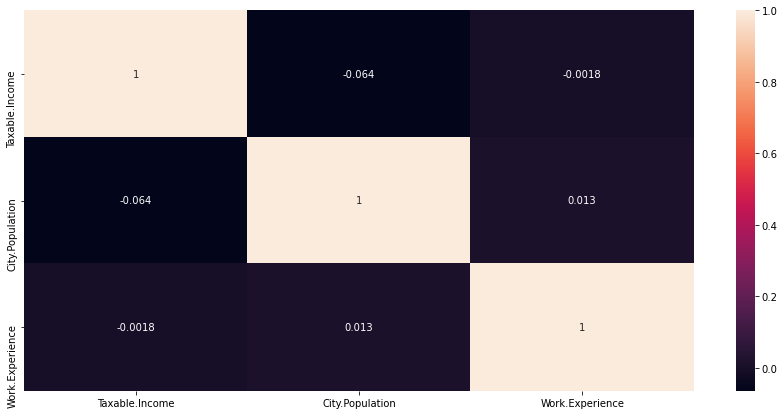

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [8]:
#grouping Taxable income  treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


bins = [0,30000,100000]
labels= ['Risky','Good']
df['Status'] = pd.cut(df['Taxable.Income'],bins=bins, labels=labels,right=False)

In [9]:
# label encoding

def label_encoding(data):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in data.select_dtypes(include=['object','category']).columns:
        data[i]= label_encoder.fit_transform(data.select_dtypes(include=['object','category'])[i]) 
        
    return data.head()

In [10]:
df2 = df.drop(columns=['Taxable.Income'])

In [14]:
label_encoding(df2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [11]:
## building model

#importin libraries
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
#from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Splitting data into training and testing data set
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1:]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, stratify =y,random_state=40)


In [16]:
model = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', random_state=40)
model.fit(x_train,y_train)

<ipython-input-16-e0f72f5a7564>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=40)

In [17]:
#Predicting on test data
y_pred = model.predict(x_test) # predicting on test data set 
pd.Series(y_pred).value_counts() # getting the count of each category 

0    92
1    28
dtype: int64

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[69, 26],
       [23,  2]], dtype=int64)

In [19]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        95
           1       0.07      0.08      0.08        25

    accuracy                           0.59       120
   macro avg       0.41      0.40      0.41       120
weighted avg       0.61      0.59      0.60       120



In [20]:
train_accuracy = []
test_accuracy = []
for n_estimators in range(1,200):
    model1 = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state=40)
    model1.fit(x_train, y_train)
    train_accuracy.append(model1.score(x_train, y_train))
    test_accuracy.append(model1.score(x_test, y_test))

<ipython-input-20-8b965fa0bdfa>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train, y_train)
<ipython-input-20-8b965fa0bdfa>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train, y_train)
<ipython-input-20-8b965fa0bdfa>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train, y_train)
<ipython-input-20-8b965fa0bdfa>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train, y_train)
<ipython-input-20-8b965fa0bdfa>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [21]:
frame = pd.DataFrame({'max_depth':range(1,200),'train_acc':train_accuracy, 'test_acc':test_accuracy})

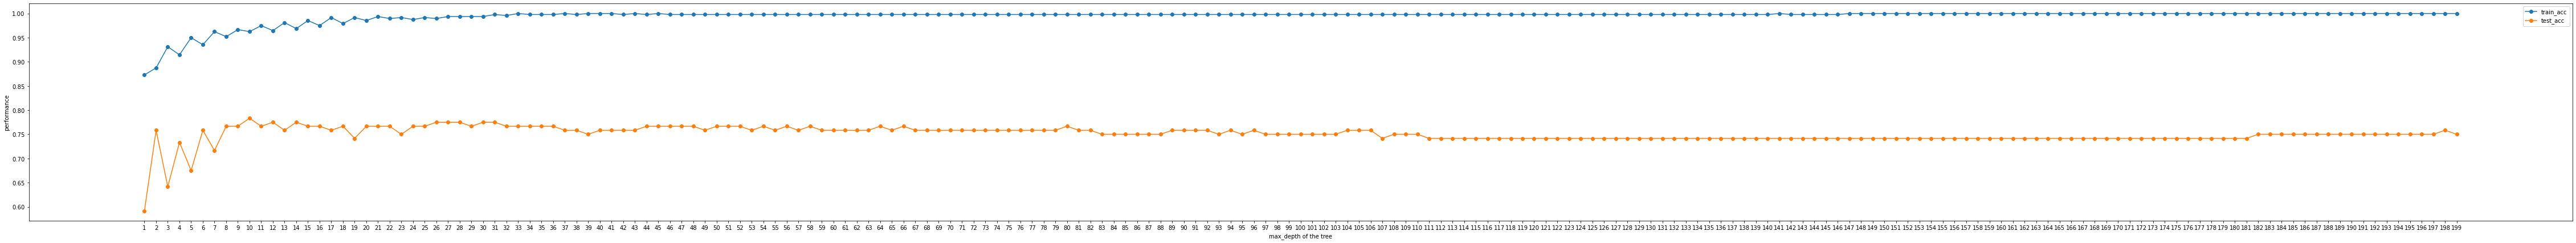

In [23]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(80,7))
ax = fig.add_subplot()
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,200))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

In [55]:
model2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=40 ,)
model2.fit(x_train,y_train)

<ipython-input-55-a269c888d215>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=40)

In [56]:
#Predicting on test data
y_pred = model2.predict(x_test) # predicting on test data set 
pd.Series(y_pred).value_counts() # getting the count of each category 

0    115
1      5
dtype: int64

In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[92,  3],
       [23,  2]], dtype=int64)

In [58]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        95
           1       0.40      0.08      0.13        25

    accuracy                           0.78       120
   macro avg       0.60      0.52      0.50       120
weighted avg       0.72      0.78      0.72       120



In [ ]:
#accuracy of model with 10 no. of trees is 79%